In [4]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [5]:
# Load the data set into python environment
data = pd.read_csv('laptop_price.csv', encoding='latin-1')
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [6]:
# Get the idea about data set
data.shape

(1303, 12)

In [7]:
data.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


Data Preprocessing

In [9]:
# Change columns as necessary
data['Ram'] = data['Ram'].str.replace('GB','').astype('int32')
data['Weight'] = data['Weight'].str.replace('kg','').astype('float32')

In [10]:
# Check the correlations with target veriable
numeric_data = data.select_dtypes(include=['number'])
print(numeric_data.corr()['Price_euros'])

laptop_ID      0.067830
Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Name: Price_euros, dtype: float64


* Laptop_ID and Inches have small correlation and there is no significan impact to do target veriable. Therefore, remove these two column from the data set

In [11]:
# Company Column
data['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

In [12]:
def add_company(inpt):
    if inpt == 'Samsung' or inpt == 'Razer' or inpt == 'Mediacom' or inpt == 'Microsoft'or inpt == 'Xiaomi'or inpt == 'Vero'or inpt == 'Chuwi'or inpt == 'Google'or inpt == 'Fujitsu'or inpt == 'LG'or inpt == 'Huawei':
        return 'Other'
    else:
        return inpt

data['Company'] = data['Company'].apply(add_company)
data['Company'].value_counts()

Company
Dell       297
Lenovo     297
HP         274
Asus       158
Acer       103
MSI         54
Other       51
Toshiba     48
Apple       21
Name: count, dtype: int64

In [13]:
# Product Column
len(data['Product'].value_counts())

618

* There are huge number of varities in this data set. It does not do more significant impact for the target variable. Thesefore, can remove the colum

In [14]:
# TypeName Column
data['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [15]:
data['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [16]:
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
data['Ips'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [17]:
data.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0


In [18]:
# CPU Column
data['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [19]:
# Ram Column
data['Ram'].value_counts()

Ram
8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: count, dtype: int64

In [20]:
# GPU Column
data['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [21]:
data.shape

(1303, 14)

In [27]:
# OpSys Column
data['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [28]:
def set_os(inpt):
    if inpt == 'Windows 10' or inpt == 'Windows 7' or inpt == 'Windows 10 S':
        return 'Windows'
    elif inpt == 'macOS' or inpt == 'Mac OS X':
        return 'Mac'
    elif inpt == 'Linux':
        return inpt
    else:
        return 'Other'


data['OpSys'] = data['OpSys'].apply(set_os)
data['OpSys'].value_counts()

OpSys
Windows    1125
Other        95
Linux        62
Mac          21
Name: count, dtype: int64

In [29]:
# Drop un-necessary Columns
data = data.drop(columns=['laptop_ID', 'Inches', 'Product', 'ScreenResolution'])

In [30]:
data.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,Mac,1.37,1339.69,0,1
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,Mac,1.34,898.94,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,Other,1.86,575.00,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,Mac,1.83,2537.45,0,1
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,Mac,1.37,1803.60,0,1


Exploratory Data Analysis

In [31]:
data.describe()

,Ram,Weight,Price_euros,Touchscreen,Ips
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,8.382195,2.038734,1123.686992,0.147352,0.280123
std,5.084665,0.665475,699.009043,0.354593,0.449231
min,2.000000,0.690000,174.000000,0.000000,0.000000
25%,4.000000,1.500000,599.000000,0.000000,0.000000
50%,8.000000,2.040000,977.000000,0.000000,0.000000
75%,8.000000,2.300000,1487.880000,0.000000,1.000000
max,64.000000,4.700000,6099.000000,1.000000,1.000000


* It looks like Ram has outliers and the data is right skewed

In [32]:
# Before do EDA, lets separate Numerical and categorical variables for easy analysis
num_cols= data[['Ram', 'Weight','Price_euros']]
cat_cols = data[['Company','TypeName','OpSys','Touchscreen','Ips','Cpu','Gpu']]


Column: Ram
Skew : 2.69


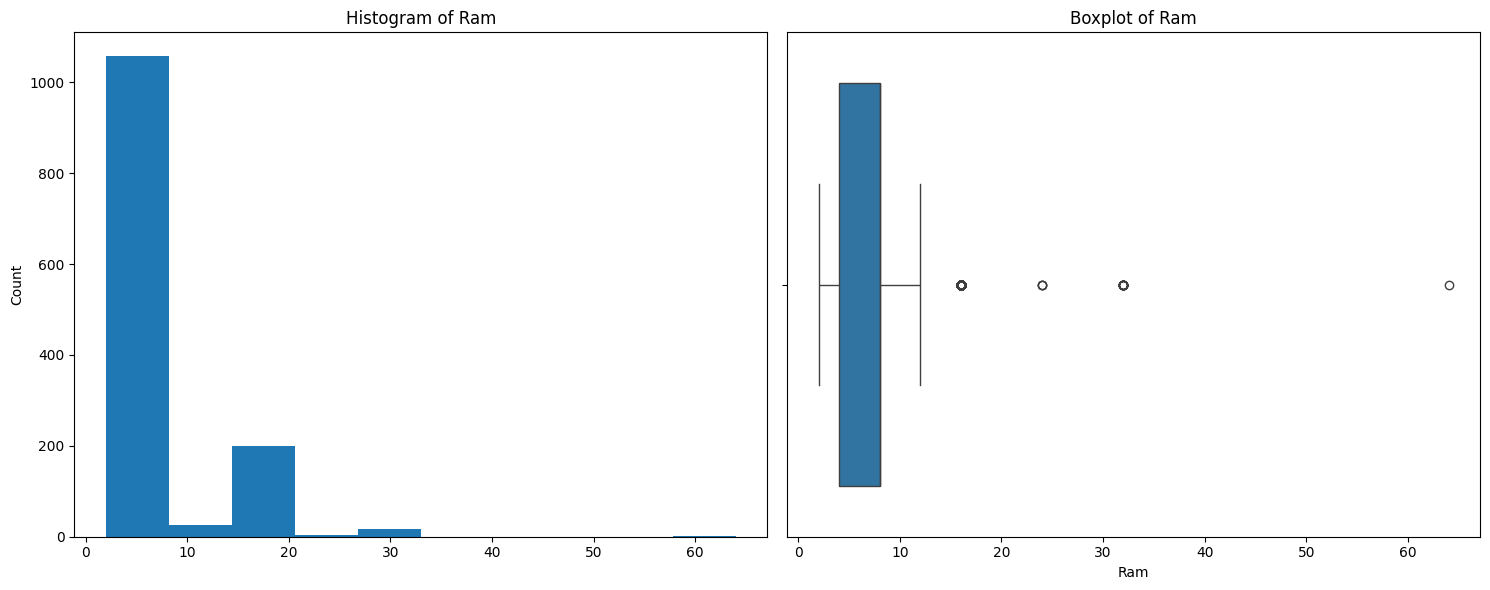


Column: Weight
Skew : 1.14


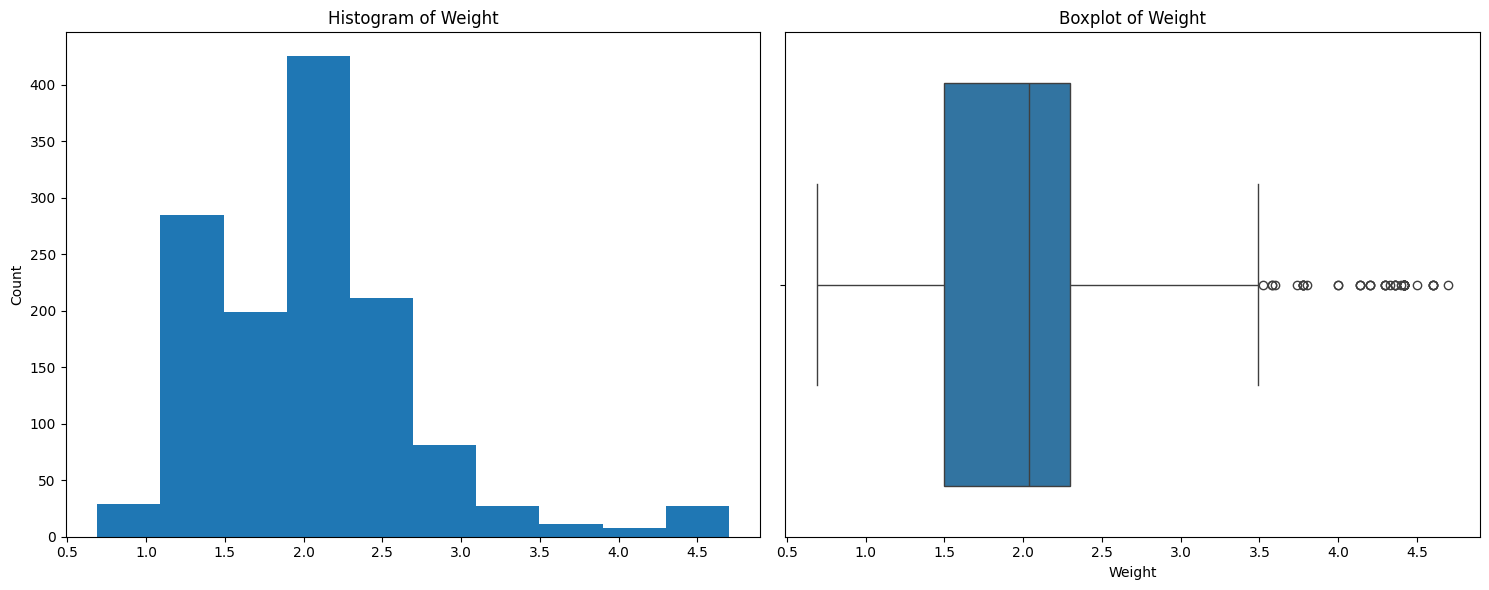


Column: Price_euros
Skew : 1.52


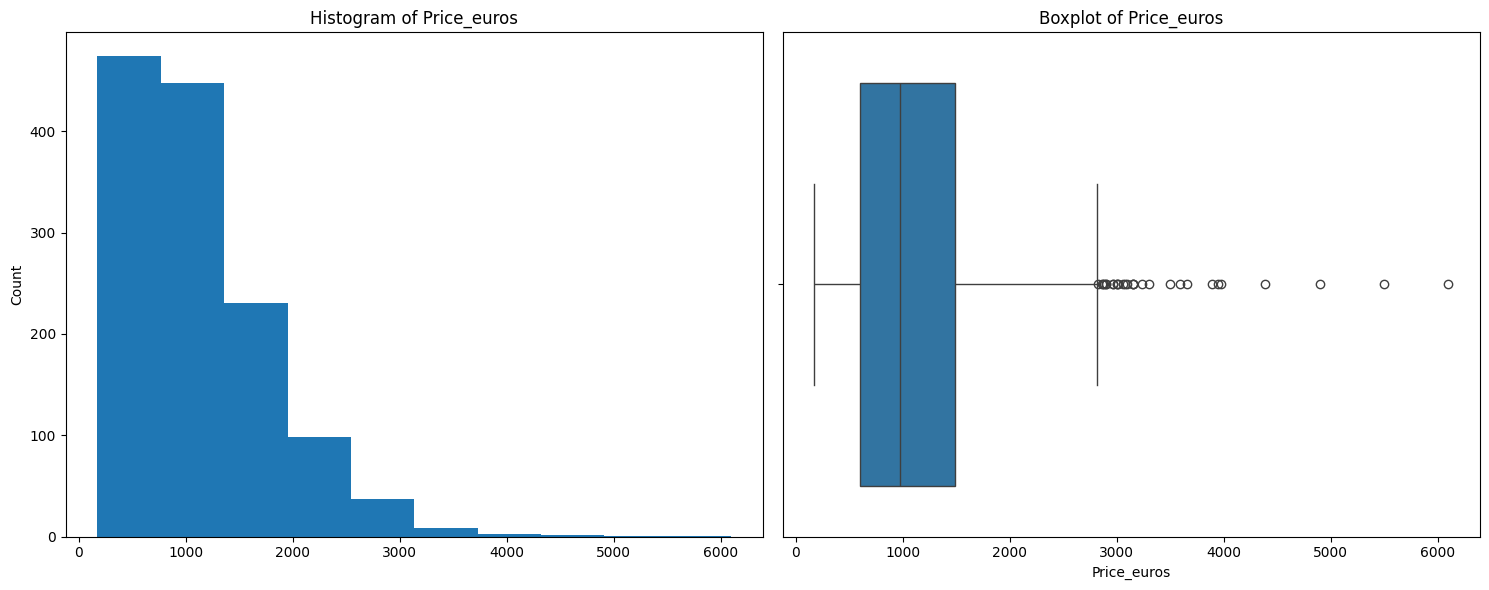

In [33]:
# EDA Univariate Analysis
for col in num_cols:
    # Print column name and skew
    print(f"\nColumn: {col}")
    print(f"Skew :", round(data[col].skew(), 2))

    # Create a figure with subplots and set figsize for better readability
    plt.figure(figsize=(15, 6)) 

    # Subplot 1: Histogram with title
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.title(f"Histogram of {col}") 
    plt.ylabel('Count')

    # Subplot 2: Boxplot with title
    plt.subplot(1, 2, 2)
    sns.boxplot(x=col, data=data)  
    plt.title(f"Boxplot of {col}")  
    
    plt.tight_layout()  
    plt.show()

* There are several outliers in Ram and Weight

Bivariate Analysis

<Figure size 3000x4500 with 0 Axes>

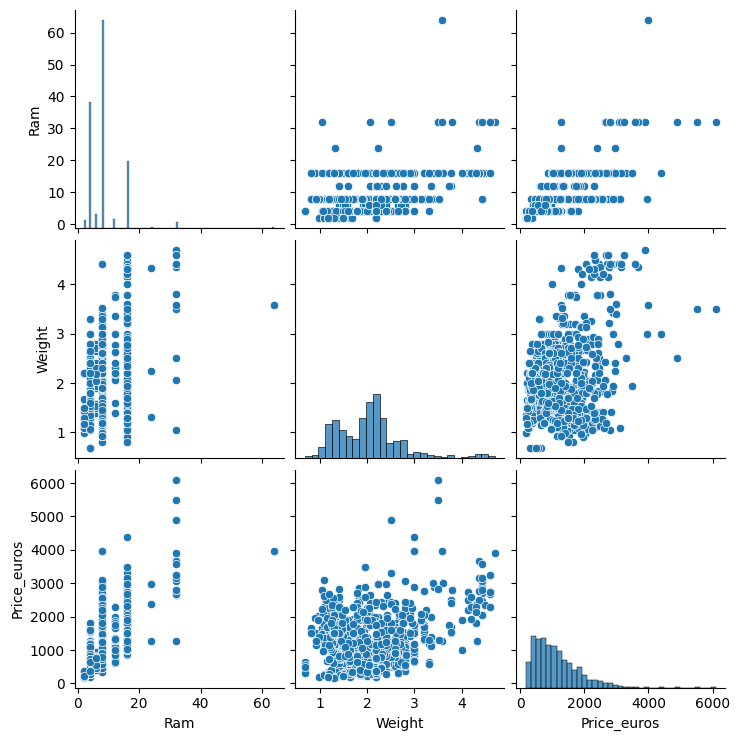

In [34]:
plt.figure(figsize=(30,45))
sns.pairplot(data=data.drop(['Company','TypeName','OpSys','Touchscreen','Ips','Cpu','Gpu'],axis=1))
plt.show()

Remove Outliers

In [35]:
'''# Define a function to remove outliers based on IQR
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]'''

'# Define a function to remove outliers based on IQR\ndef remove_outliers(data, column):\n    Q1 = data[column].quantile(0.25)\n    Q3 = data[column].quantile(0.75)\n    IQR = Q3 - Q1\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]'

In [36]:
''''# Remove outliers in 'fc' and 'px_height' columns
data = remove_outliers(data, 'Weight')
data = remove_outliers(data, 'Ram')'''

"'# Remove outliers in 'fc' and 'px_height' columns\ndata = remove_outliers(data, 'Weight')\ndata = remove_outliers(data, 'Ram')"

In [37]:
'''# List of columns you want to create box plots for
columns = ['Weight', 'Ram']

# Create a single figure with subplots for each column
plt.figure(figsize=(12, 6)) 

# Loop through each column and create a subplot for it
for i, column in enumerate(columns):
    plt.subplot(1, len(columns), i + 1)
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)  # Label for the x-axis

plt.tight_layout()  
plt.show()'''

'# List of columns you want to create box plots for\ncolumns = [\'Weight\', \'Ram\']\n\n# Create a single figure with subplots for each column\nplt.figure(figsize=(12, 6)) \n\n# Loop through each column and create a subplot for it\nfor i, column in enumerate(columns):\n    plt.subplot(1, len(columns), i + 1)\n    sns.boxplot(x=data[column])\n    plt.title(f"Boxplot of {column}")\n    plt.xlabel(column)  # Label for the x-axis\n\nplt.tight_layout()  \nplt.show()'

* When check the model accuracy by removing outliers, it shows significantly low number. There for, train the model with outliers values

One-Hot Encoding

In [38]:
data = pd.get_dummies(data)
data.head(2)

,Ram,Weight,Price_euros,Touchscreen,Ips,Company_Acer,Company_Apple,Company_Asus,Company_Dell,Company_HP,...,Gpu_Nvidia Quadro M2200M,Gpu_Nvidia Quadro M3000M,Gpu_Nvidia Quadro M500M,Gpu_Nvidia Quadro M520M,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M,OpSys_Linux,OpSys_Mac,OpSys_Other,OpSys_Windows
0,8,1.37,1339.69,0,1,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,8,1.34,898.94,0,0,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


Model Building and Selection

In [39]:
# Define X variable and Y variable
X = data.drop('Price_euros', axis=1)
y = data['Price_euros']

In [41]:
# Divide data set into training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [42]:
X_train.shape, X_test.shape

((1042, 251), (261, 251))

model training

In [43]:
def model_acc(model):
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(str(model)+ ' --> ' +str(acc))

In [47]:
# Train with several models
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_acc(lr)

from sklearn.linear_model import Lasso
lasso = Lasso()
model_acc(lasso)

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
model_acc(dt)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_acc(rf)

LinearRegression() --> 0.7259952949058375
Lasso() --> 0.7534383509912702
DecisionTreeRegressor() --> 0.6905971787906038
RandomForestRegressor() --> 0.8005901210053066


* Random Forest shows higher accuracy score than other models. So, use Random Forest for hyper parameter optimization

Hyper Parameter Optimization

In [45]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 50, 500],
              'criterion':['squared_error','absolute_error','poisson']}

grid_obj = GridSearchCV(estimator=rf, param_grid=parameters)

grid_fit = grid_obj.fit(X_train, y_train)

best_model = grid_fit.best_estimator_

best_model.score(X_test, y_test)

0.8016950075865226

In [51]:
X_test.columns


Index(['Ram', 'Weight', 'Touchscreen', 'Ips', 'Company_Acer', 'Company_Apple',
       'Company_Asus', 'Company_Dell', 'Company_HP', 'Company_Lenovo',
       ...
       'Gpu_Nvidia Quadro M2200M', 'Gpu_Nvidia Quadro M3000M',
       'Gpu_Nvidia Quadro M500M', 'Gpu_Nvidia Quadro M520M',
       'Gpu_Nvidia Quadro M620', 'Gpu_Nvidia Quadro M620M', 'OpSys_Linux',
       'OpSys_Mac', 'OpSys_Other', 'OpSys_Windows'],
      dtype='object', length=251)

Save Model

In [52]:
import pickle
with open('predictor.pickle', 'wb') as file:
    pickle.dump(best_model, file)

In [63]:
pred_value = best_model.predict([[10, 1.2, 1, 1, 0, 1, 0, 0, 0,0,0,0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]



])
pred_value

a:\ML_Projects\ML_Project_01\lap_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1308.001])